# Travelling Salesman
## Convex hull approximate solution
- Start with a convex hull around all points
- Build up the path using a greedy algorithm that adding the point that is closest to an existing edge
- Once all the points are added, tweak the path
    - move around every edge and check whether going to the closest point shortens the overall path
    - continue until no improvements are found


In [3]:
%matplotlib inline
import numpy as np
import matplotlib.pylab as plt
from scipy.spatial import ConvexHull, convex_hull_plot_2d
import time
from IPython.display import clear_output


In [54]:
def extra_peri(p1, p2, p3):
    '''calculate extra distance'''
    return np.linalg.norm((p1 - p3)) + np.linalg.norm((p2 - p3)) - np.linalg.norm((p1 - p2))

def internal(points,route):
    return np.delete(points,route,0)
    

def find_nearest(i,points,route,inside=True):
    """Find nearest point to edge defined by position i in route
    If inside is True, use all points inside the route (used to find initial route)
    Else use all points not on the current edge (used to tweak final route)"""
    min_extra = 999
    edge = (points[route[i-1]],points[route[i]])
    sample = internal(points,route) if inside else np.delete(points,[route[i-1],route[i]],axis=0)
    for point in sample:
        A = extra_peri(*edge,point)
        if A < min_extra:
            min_extra = A
            closest = point
    return (np.where(points==closest)[0])[0], min_extra
        
def plot_route(points,route,building=True):
    clear_output(wait=True)
    froute = np.append(route,route[0])
    plt.plot(points[:,0], points[:,1], 'o')
    plt.plot(points[froute,0],points[froute,1])
    #for i,(x,y) in enumerate(points):
    #    plt.text(x, y, i, va='bottom', ha='center')
    plt.title(f'Route length {route_length(route):.2f} {"Building" if building else "Tweaked"}')
    plt.savefig(f'ims/{int(time.time())}{int(time.time() % 1 * 1e6):06d}.png')
    plt.axis('off')
    plt.show()

    

In [19]:

def find_best_edge(route,points):
    min_dist = 999
    best_edge = 0
    #nearest_points = {}
    for i in range(len(route)):
        (p,d) = find_nearest(i,points,route)
        #nearest_points[(route[i-1],route[i])] = (p,d)
        if d < min_dist:
            min_dist = d
            best_edge = (i,p)
    i = best_edge[0]
    #del nearest_points[(route[i-1],route[i])]
    return best_edge

def route_length(route):
    return sum([np.linalg.norm(points[route[i]]-points[route[i-1]]) for i in range(len(route))])
    


In [20]:
def find_initial_route(points):
    hull = ConvexHull(points)
    route = hull.vertices
    fig,ax = plt.subplots(1,1)

    while len(route) < len(points):
        plot_route(points,route)
        best_edge = find_best_edge(route,points)
        #print('Best edge',best_edge)#,route,nearest_points)
        #print(points[10],'Internal',internal(points,route))

        route = np.insert(route, best_edge[0], best_edge[1])
        #time.sleep(0.5)

    plot_route(points,route)
    return route


def salesman(points):
    route = find_initial_route(points)
    ### Tweak initial route
    route = tweak_route(route,points)
    
    
    return route

- Tweak route
    - The idea is to find the closest point to each edge and check whether visiting it between the two end points of the edge reduces the total path length


In [21]:
def tweak_route(route,points):
    """The idea is to find the closest point to each edge and 
    check whether visiting it between the two end points of the edge 
    reduces the total path length"""
    
    shortest_route = route
    shortest_length = route_length(shortest_route)
    improvements = [shortest_length]
    found = True
    while found:
        for i in range(len(route)):
            route2 = route
            candidate,_ = find_nearest(i,points,route,inside=False)
            end_point = route[i]
            index_c = np.where(route2==candidate)[0][0]
            route2 = np.delete(route2,index_c)
            index_to = np.where(route2==end_point)[0][0]
            route2 = np.insert(route2, index_to, candidate)

            if route_length(route2) < shortest_length:
                shortest_route = route2
                shortest_length = route_length(shortest_route)
                improvements += [shortest_length]
                break
        found = not np.array_equal(route,shortest_route) 
        route = shortest_route
        #time.sleep(0.5)
        plot_route(points,route,False)
    print(f"Improvements from tweaking initial route: {['{0:.2f}'.format(i) for i in improvements]}")
    return route          



In [55]:
n = 300
points = np.random.random((n, 2) )  # 30 random points in 2-D


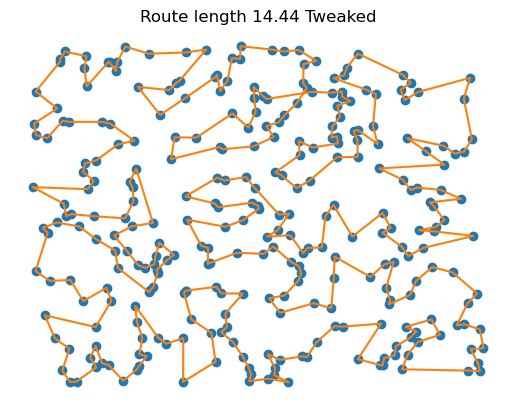

Improvements from tweaking initial route: ['15.01', '15.00', '14.99', '14.98', '14.97', '14.95', '14.92', '14.92', '14.91', '14.87', '14.86', '14.84', '14.82', '14.80', '14.78', '14.78', '14.78', '14.74', '14.74', '14.71', '14.71', '14.70', '14.69', '14.67', '14.65', '14.64', '14.63', '14.61', '14.60', '14.59', '14.57', '14.57', '14.56', '14.55', '14.53', '14.52', '14.49', '14.47', '14.45', '14.45', '14.44', '14.44']


In [56]:
route = salesman(points)
#plot_route(points,route)

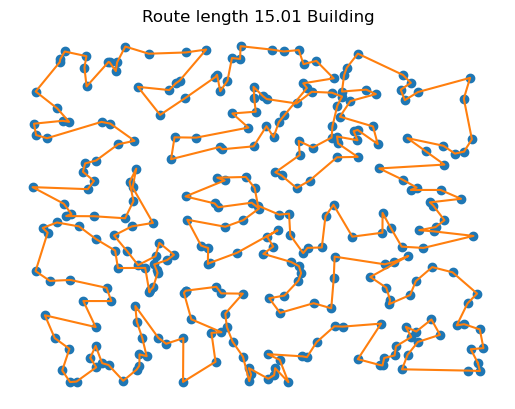

In [57]:
route = find_initial_route(points)

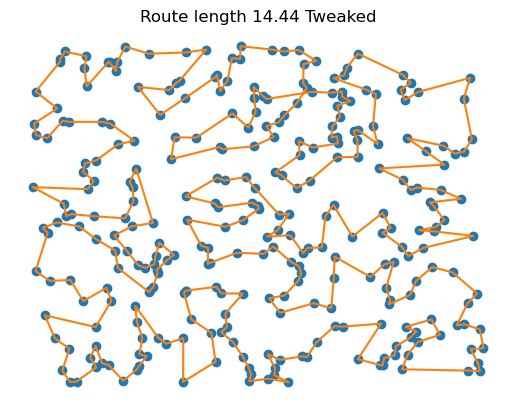

Improvements from tweaking initial route: ['15.01', '15.00', '14.99', '14.98', '14.97', '14.95', '14.92', '14.92', '14.91', '14.87', '14.86', '14.84', '14.82', '14.80', '14.78', '14.78', '14.78', '14.74', '14.74', '14.71', '14.71', '14.70', '14.69', '14.67', '14.65', '14.64', '14.63', '14.61', '14.60', '14.59', '14.57', '14.57', '14.56', '14.55', '14.53', '14.52', '14.49', '14.47', '14.45', '14.45', '14.44', '14.44']


In [58]:
route = tweak_route(route,points)

In [33]:
points = np.array([[-2.08794700e-01,  5.14682995e+01],
       [ 9.39663800e-01,  5.12898764e+01],
       [ 7.32766700e-01,  5.09511871e+01],
       [-8.58827200e-01,  5.07623646e+01],
       [-1.87991180e+00,  5.07201514e+01],
       [-3.41468010e+00,  5.06190962e+01],
       [-4.21619220e+00,  5.05238826e+01],
       [-5.06882620e+00,  5.01552197e+01],
       [-5.47950830e+00,  5.02149064e+01],
       [-4.54693610e+00,  5.08285252e+01],
       [-4.12546620e+00,  5.12076674e+01],
       [-2.85265310e+00,  5.14360625e+01],
       [-3.26669250e+00,  5.14065052e+01],
       [-4.03566640e+00,  5.16489264e+01],
       [-4.51228310e+00,  5.58365170e+01],
       [-4.26001530e+00,  5.22431766e+01],
       [-4.41875650e+00,  5.28879082e+01],
       [-2.72507890e+00,  5.39888000e+01],
       [-3.77644760e+00,  5.33178035e+01],
       [-3.00417510e+00,  5.36475988e+01],
       [-2.86509380e+00,  5.40721085e+01],
       [-3.42338170e+00,  5.43835656e+01],
       [-3.61079360e+00,  5.50691397e+01],
       [-4.54841060e+00,  5.47372224e+01],
       [-5.00447370e+00,  5.51014603e+01],
       [-4.92448680e+00,  5.59481104e+01],
       [-5.47237310e+00,  5.64120166e+01],
       [-5.82944880e+00,  5.70061325e+01],
       [-6.68015800e+00,  5.74757994e+01],
       [-5.64958980e+00,  5.75234507e+01],
       [-5.15866470e+00,  5.78978237e+01],
       [-5.01910800e+00,  5.82563273e+01],
       [-4.78415670e+00,  5.85538330e+01],
       [-4.41731920e+00,  5.84795782e+01],
       [-3.09158270e+00,  5.84425516e+01],
       [-4.16921030e+00,  5.76884029e+01],
       [-3.28146250e+00,  5.77220766e+01],
       [-2.09280950e+00,  5.71482429e+01],
       [-2.79558440e+00,  5.63403902e+01],
       [-2.72091290e+00,  5.60581178e+01],
       [-1.70723540e+00,  5.54133398e+01],
       [-1.06879140e+00,  5.46179021e+01],
       [ 2.71753000e-02,  5.37309927e+01],
       [ 3.31034300e-01,  5.32285575e+01],
       [ 7.43961500e-01,  5.29642128e+01],
       [ 1.67930950e+00,  5.23260841e+01],
       [ 1.15278650e+00,  5.17883997e+01],
       [ 3.64389600e-01,  5.14631174e+01],
       [-1.23072400e-01,  5.15222469e+01]])

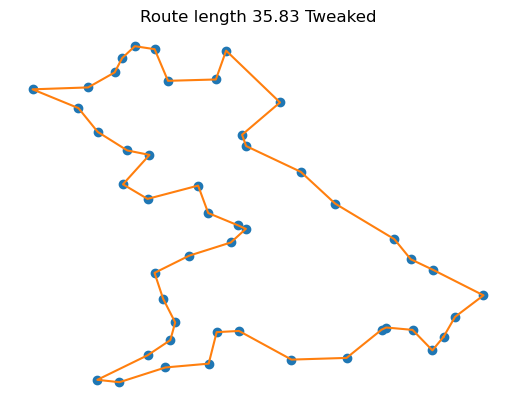

Improvements from tweaking initial route: ['36.31', '36.20', '35.83']


In [38]:
route = salesman(points)

In [28]:
len(route), len(points)

(50, 50)

In [29]:
route

array([ 1, 46, 45, 44, 43, 42, 41, 40, 37, 36, 34, 33, 32, 31, 30, 29, 28,
       27, 26, 25, 24, 23, 16, 15, 13, 10,  8,  7,  9,  6,  5,  4,  3,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  2],
      dtype=int32)

In [30]:
internal(points,route)

array([[-2.8526531, 51.4360625],
       [-3.2666925, 51.4065052],
       [-4.5122831, 55.836517 ],
       [-2.7250789, 53.9888   ],
       [-3.7764476, 53.3178035],
       [-3.0041751, 53.6475988],
       [-2.8650938, 54.0721085],
       [-3.4233817, 54.3835656],
       [-3.6107936, 55.0691397],
       [-4.1692103, 57.6884029],
       [-2.7955844, 56.3403902],
       [-2.7209129, 56.0581178],
       [ 0.3643896, 51.4631174],
       [-0.1230724, 51.5222469],
       [-0.2087947, 51.4682995]])

In [32]:
points

array([[-2.08794700e-01,  5.14682995e+01],
       [ 9.39663800e-01,  5.12898764e+01],
       [ 7.32766700e-01,  5.09511871e+01],
       [-8.58827200e-01,  5.07623646e+01],
       [-1.87991180e+00,  5.07201514e+01],
       [-3.41468010e+00,  5.06190962e+01],
       [-4.21619220e+00,  5.05238826e+01],
       [-5.06882620e+00,  5.01552197e+01],
       [-5.47950830e+00,  5.02149064e+01],
       [-4.54693610e+00,  5.08285252e+01],
       [-4.12546620e+00,  5.12076674e+01],
       [-2.85265310e+00,  5.14360625e+01],
       [-3.26669250e+00,  5.14065052e+01],
       [-4.03566640e+00,  5.16489264e+01],
       [-4.51228310e+00,  5.58365170e+01],
       [-4.26001530e+00,  5.22431766e+01],
       [-4.41875650e+00,  5.28879082e+01],
       [-2.72507890e+00,  5.39888000e+01],
       [-3.77644760e+00,  5.33178035e+01],
       [-3.00417510e+00,  5.36475988e+01],
       [-2.86509380e+00,  5.40721085e+01],
       [-3.42338170e+00,  5.43835656e+01],
       [-3.61079360e+00,  5.50691397e+01],
       [-4.